# Hotel Review Analysis
--------------------------
### Content Page

<a href='#Introduction'>Introduction</a>

<a href='#Executive_Summary'>Executive Summary</a>

<a href='#Technologies_and_Techniques'>Technologies and Techniques</a>

<a href='#Cleaning_and_Preparing_Data'>Cleaning and Preparing Data</a>

<a href='#Results'>Results</a>

# Introduction
Booking.com has collected data about visits to hotels of various europian countries with reviews and other data points like room type, family type of visitors, booking type, country of visitors etc. Data has around 515k reviews in total for 1,493 luxury hotels accross europian countries of UK, France, SPain, Italy, Austria and Netherlands. We'll be performing analysis on data based on host country and performance of its hotels giving extra importance to UK hotels. 

# Executive Summary

Below report start with data loading and data cleaning of reviews collected by booking.com for hotels of 6 european countries (UK, France, Italy, Austria, Netherlands and Spain). Data cleaning part involves removing unwanted spaces from data as well as creation of new attributes for each review like month & year of review, reviewer family type, visit purpose, no of nights spent at hotel etc. Detailed data analysis done after data cleaning takes into consideration relationship between various attributes of review and host countries with UK given extra importance as around 50% review in corpus belogs to UK hotels.

From total corpus, nearly `~50%` belongs to UK whereas other 5 countries has reviews around `~7%-11%`. Around `65%` of total visits to UK consist of local population. Eventhough france has highest luxury hotels`(458)`, it contributes only `11%` of reviews.Positive/Negative reviews distribution for each contry is around `45% & 55%`. 

Each country saw highest amount of visitors in `2016` which declined `~30%` in `2017`. People has spent between `1-30 nights` in various hotels accross europe but majority of trips ends in `1-4 nights` `(1-night : 38%, 2-night : 26%,3-night : 18%, 4-night : 9%)`. UK has majority of visits which ends in 1-night or 2 nights wherease countries like Netherands, Spain and France has 2 or more nights spent at hotels. Majority of visits are done by Couple, Groups and Solo travellers where `>50%` solo travellers come for business purpose and `8%-10%` couple & groups travel for business purpose. 

Austrian travellers has given `~21` negative words to hotels from UK, Netherlands, Spain and Italy. France hotels has received less negative reviews from other countries wheareas UK travellers generally writes less negative words. Austrian travellers has given most negative reviews to UK. UK travellers has given least positive reviews to UK itself whereas Austrian hotels has received most positive reviews and UK last positive reviews. Asian and African country travellers has on average written more negative words. 

North/South American, Europian and antarctica travellers has given most positive reviews with few exception positive reviews from asian and african countries. Countries like Laos, US, Finland, Bahamas, Jamaica, Trinidad and Tobago, Sierre Leone, Uganda, Brunei and Vantau has written more than `25 positive words` in positive reviews. Countries like Moldova, Montonegero, Armenia, Afghanistan, Rwanda, Malvi, Namibia, Laos, Brunei and Papua New Guinea has written quite bad reviews with on average `30-35 negative words` per review.

Word cloud for positive words indicate that customers were happy with friendly/helpful staff, great location, comfortable bed, cleaninliness, good breakfast, spacious rooms, less walking distance etc. Word Cloud for negative words indicated that customers had problems with small rooms, shower working, air conditioning, poor lift, wrong/extra price etc.

France should concentrate more on attracting travellers as it has highest hotels but only 11% of total travellers. UK has been most visited for Business purpose whereas other countries for Leisure purpose. Other countries should try to attract business peoples. All hotels should take care of African and Asian travellers as their bad reviews can impact hotel impression. Air conditioning, small rooms and wrong prices for reservations are some of main concerns of travllers which hotel should address with priority.

# Technologies_and_Techniques
Analysis is done using Python and jupyter notebook with **matplotlib** as primary library for visualisation. Analysis was performed using various plot types like Pie chart, bar chart, choropleth map and word cloud. **Geopandas** library was used for displaying choropleth map.

Analysis mainly is performed keeping host country in mind giving extra importance to UK. We have done analysis about which countries has more visitors, visitor familty types, purpose of visits and reviews given by visitors.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

import os
from collections import Counter
import json
import warnings

warnings.filterwarnings('ignore')

print('Matplotlib Version : ', matplotlib.__version__)
stop_words = list(set(stopwords.words('english') + list(STOPWORDS)))
np.set_printoptions(precision=2)
pd.set_option('precision',2)
%matplotlib inline

Matplotlib Version :  3.0.3


# Cleaning_and_Preparing_Data
* Loading Hotel Reviews Data
* Removing extra white spaces from string fields
* Creating new attribute Review Type which decided whether review is Positive or Negtive based on Positive and Negative words count in reivew.
* Adding new attributes Month and Year based on in which month and year review was added.

In [2]:
%%time

hotel_reviews = pd.read_csv('/kaggle/input/hotel-dataset-for-visualisation-work/Hotel_Reviews.csv', parse_dates=['Review_Date'])
hotel_reviews['Reviewer_Nationality'] = [nationality.strip() for nationality in hotel_reviews['Reviewer_Nationality']]
hotel_reviews['Hotel_Country'] = [address.split(' ')[-1] if 'United Kingdom' not in address else 'United Kingdom' for address in hotel_reviews.Hotel_Address]
hotel_reviews['Review_Type'] = ['Positive' if pos_count> neg_count else 'Negative' if pos_count<neg_count else 'Neutral' for pos_count, neg_count in zip(hotel_reviews.Review_Total_Positive_Word_Counts, hotel_reviews.Review_Total_Negative_Word_Counts)]
hotel_reviews['days_since_review'] = [int(days.split(' ')[0]) for days in hotel_reviews.days_since_review]
hotel_reviews['Month'] = [dt.month_name() for dt in hotel_reviews.Review_Date]
hotel_reviews['Year'] = [dt.year for dt in hotel_reviews.Review_Date]
hotel_reviews.head()

CPU times: user 11.8 s, sys: 792 ms, total: 12.6 s
Wall time: 12.6 s


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Review_Type,Month,Year
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.36,4.92,Netherlands,Negative,August,2017
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.36,4.92,Netherlands,Positive,August,2017
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,52.36,4.92,Netherlands,Negative,July,2017
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.36,4.92,Netherlands,Negative,July,2017
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.36,4.92,Netherlands,Negative,July,2017


* Below we are adding few new attributes to dataset based on tags data provided with each review. Below are list of attributes added.
    * `With_Pet` : Wether guest brought Pet or not.
    * `Trip_Type` : Business Trip or Leisure Trip
    * `Family_Type` : Solo, Group, Family with young children, Family with old children, Friends, etc.
    * `Room_Type` : Duplex, Single Room, etc.
    * `No_Of_Nights` : No of nights spent at hotel
    * `Submitted_Via` : Whether booking was done via mobile or not.
 

In [3]:
%%time

all_tags = []

for tag in hotel_reviews.Tags:
    tags = eval(tag)
    with_a_pet, trip_type, family_type, room_type, no_of_night, submitted_via  = [None] * 6
    if len(tags) == 6:
        with_a_pet, trip_type, family_type, room_type, no_of_night, submitted_via  = tags
    elif len(tags) == 5:
        if 'pet' in tags[0]:
            if 'mobile' in tags[-1]:
                with_a_pet, family_type, room_type, no_of_night, submitted_via  = tags
            else:
                with_a_pet, trip_type, family_type, room_type, no_of_night  = tags
        else:
            trip_type, family_type, room_type, no_of_night, submitted_via = tags
    elif len(tags) == 4:
        if 'mobile' in tags[-1]:
            family_type, room_type, no_of_night, submitted_via = tags
        else:
            if 'pet' in tags[0]:
                with_a_pet, family_type, room_type, no_of_night = tags
            else:
                trip_type, family_type, room_type, no_of_night = tags
    elif len(tags) == 3:
        if 'trip' in tags[0]:
            trip_type, family_type, submitted_via = tags
        else:
            if 'pet' in tags[0]:
                with_a_pet, trip_type, family_type = tags
            else:
                family_type, room_type, no_of_night = tags
    elif len(tags) == 2:
        if 'trip' in tags[0]:
            trip_type, family_type = tags
        else:
            family_type, submitted_via = tags
    else:
        family_type = tags[0]
        
    all_tags.append([with_a_pet, trip_type, family_type, room_type, no_of_night, submitted_via])
all_tags = list(zip(*all_tags))

hotel_reviews['With_Pet'] = [p_type.strip() if p_type else p_type for p_type in all_tags[0] ]
hotel_reviews['Trip_Type'] = [t_type.strip() if t_type else t_type for t_type in all_tags[1] ]
hotel_reviews['Family_Type'] = [f_type.strip() if f_type else f_type for f_type in all_tags[2] ]
hotel_reviews['Room_Type'] = [r_type.strip() if r_type else r_type for r_type in all_tags[3]]
hotel_reviews['No_Of_Nights'] = [int(nights.strip().split(' ')[1]) if nights else nights for nights in all_tags[4]]
hotel_reviews['Submitted_Via'] = [sub.strip() if sub else sub for sub in all_tags[5]]

hotel_reviews.head(3)

CPU times: user 9.06 s, sys: 440 ms, total: 9.5 s
Wall time: 9.49 s


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Hotel_Country,Review_Type,Month,Year,With_Pet,Trip_Type,Family_Type,Room_Type,No_Of_Nights,Submitted_Via
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,Netherlands,Negative,August,2017,None,Leisure trip,Couple,Duplex Double Room,6.0,None
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,Netherlands,Positive,August,2017,None,Leisure trip,Couple,Duplex Double Room,4.0,None
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,Netherlands,Negative,July,2017,None,Leisure trip,Family with young children,Duplex Double Room,3.0,Submitted from a mobile device


# Results

## Country Wise Statistics of Hotels
Below we are calculating various statistics for each country from Europe whose data is present in `booking.com` reviews provided to us. We have found out that all reviews contains review for hotels from 6 countries namely UK, France, Netherlands, Spain, Italy and Austria.

Below are some of the observations for each country:
* More than 50% review present in corpus comes for United Kingdom Hotels. Out of this 50% entries around 65% entries are from people of UK itself.
* Other countries like France, Spain, Italy, Netherlands and Spain has only around 2-3% local population going to local hotels and remaining 95%+ comes from foriegn countries.
* France has highest number of hotels in all but amounts to only 11% reviews.
* Average rating of hotels per country is between 8-9.
* Average negative words used for each countries range in 17-19 words per review.
* Average positive words used for each countries range in 18-19 words per review.
* Positive Reviews and Negative Reviews distribution for each country are around 45% and 55% from total.

In [4]:
%%time

index = []
results = []

for hotel_country in hotel_reviews.Hotel_Country.unique():
    index.append(hotel_country)
    country_wise_entries = hotel_reviews[hotel_reviews.Hotel_Country == hotel_country]
    same_country_visits = country_wise_entries[country_wise_entries.Reviewer_Nationality == hotel_country]
    review_type_counts = Counter(country_wise_entries.Review_Type)
    
    print('Country : %-14s has received %-6d (%05.2f%%) reviews. Unique Hotels : %d. Same Country Customers : %-6d (%05.2f%%)'%(
                                                                                    hotel_country, 
                                                                                    country_wise_entries.shape[0],
                                                                                    country_wise_entries.shape[0]*100/hotel_reviews.shape[0], 
                                                                                    country_wise_entries.Hotel_Name.unique().shape[0],
                                                                                    same_country_visits.shape[0],
                                                                                    same_country_visits.shape[0]*100/country_wise_entries.shape[0]
                                                                                    ))
    results.append([country_wise_entries.Hotel_Name.unique().shape[0], country_wise_entries.Average_Score.mean(),
    country_wise_entries.Review_Total_Negative_Word_Counts.mean(), country_wise_entries.Review_Total_Positive_Word_Counts.mean(),
    country_wise_entries.Reviewer_Nationality.unique().shape[0], review_type_counts.get('Positive',0), review_type_counts.get('Negative',0),
    review_type_counts.get('Neutral',0), country_wise_entries.days_since_review.mean()])
    
    
df = pd.DataFrame(results,index=index,columns=['Unique Hotels', 'Average_Score','Average_Negative_Words','Average_Positive_Words',\
                                               'Unique_Countries','Positive','Negative', 'Neutral','Average_Days_Since_Review'])
df

Country : Netherlands    has received 57214  (11.09%) reviews. Unique Hotels : 105. Same Country Customers : 1733   (03.03%)
Country : United Kingdom has received 262301 (50.86%) reviews. Unique Hotels : 400. Same Country Customers : 170649 (65.06%)
Country : France         has received 59928  (11.62%) reviews. Unique Hotels : 458. Same Country Customers : 1860   (03.10%)
Country : Spain          has received 60149  (11.66%) reviews. Unique Hotels : 211. Same Country Customers : 1778   (02.96%)
Country : Italy          has received 37207  (07.21%) reviews. Unique Hotels : 162. Same Country Customers : 1451   (03.90%)
Country : Austria        has received 38939  (07.55%) reviews. Unique Hotels : 158. Same Country Customers : 932    (02.39%)
CPU times: user 1.18 s, sys: 284 ms, total: 1.46 s
Wall time: 1.38 s


,Unique Hotels,Average_Score,Average_Negative_Words,Average_Positive_Words,Unique_Countries,Positive,Negative,Neutral,Average_Days_Since_Review
Netherlands,105,8.39,19.44,19.62,180,30731,24848,1635,342.07
United Kingdom,400,8.34,19.22,16.46,199,129869,124220,8212,355.78
France,458,8.41,16.74,18.89,200,34235,23780,1913,360.96
Spain,211,8.52,18.12,19.63,180,33808,24613,1728,352.35
Italy,162,8.43,17.49,18.21,171,20768,15243,1196,347.51
Austria,158,8.56,17.06,18.96,174,22169,15593,1177,363.40


## Country Wise Visualisations with Attributes like Year, Nights Spent, Family Type and Trip Type
Below are list of findings from below visualisation for each country:
* All countries saw more visits in 2016 than in 2017. Visits in 2017 drops significantly around 30% per country.
* People has generally spent from 1-30 nights in various hotels. Most of entries in dataset has less than 7 nights spent hence we have ignored entries with more than 7 nights as they were quite less. 
* Around 38% entries are 1 nights, 26% 2 nights, 18% 3nights and 9% 4 nights. Majority of people are spending less than 4 days in hotels.
* Countries like spain has people spent around 3 or more nights there. Netherlands and France has more than 2 nights spent.
* Most of visits are done by Group, Solo and Couples with Couples doing highest amount of trips in all countries. 
* Solo travellers are more than half visiting for business trip purpose
* Around 10% of couple and nearly 8% of groups also travels for business purpose.

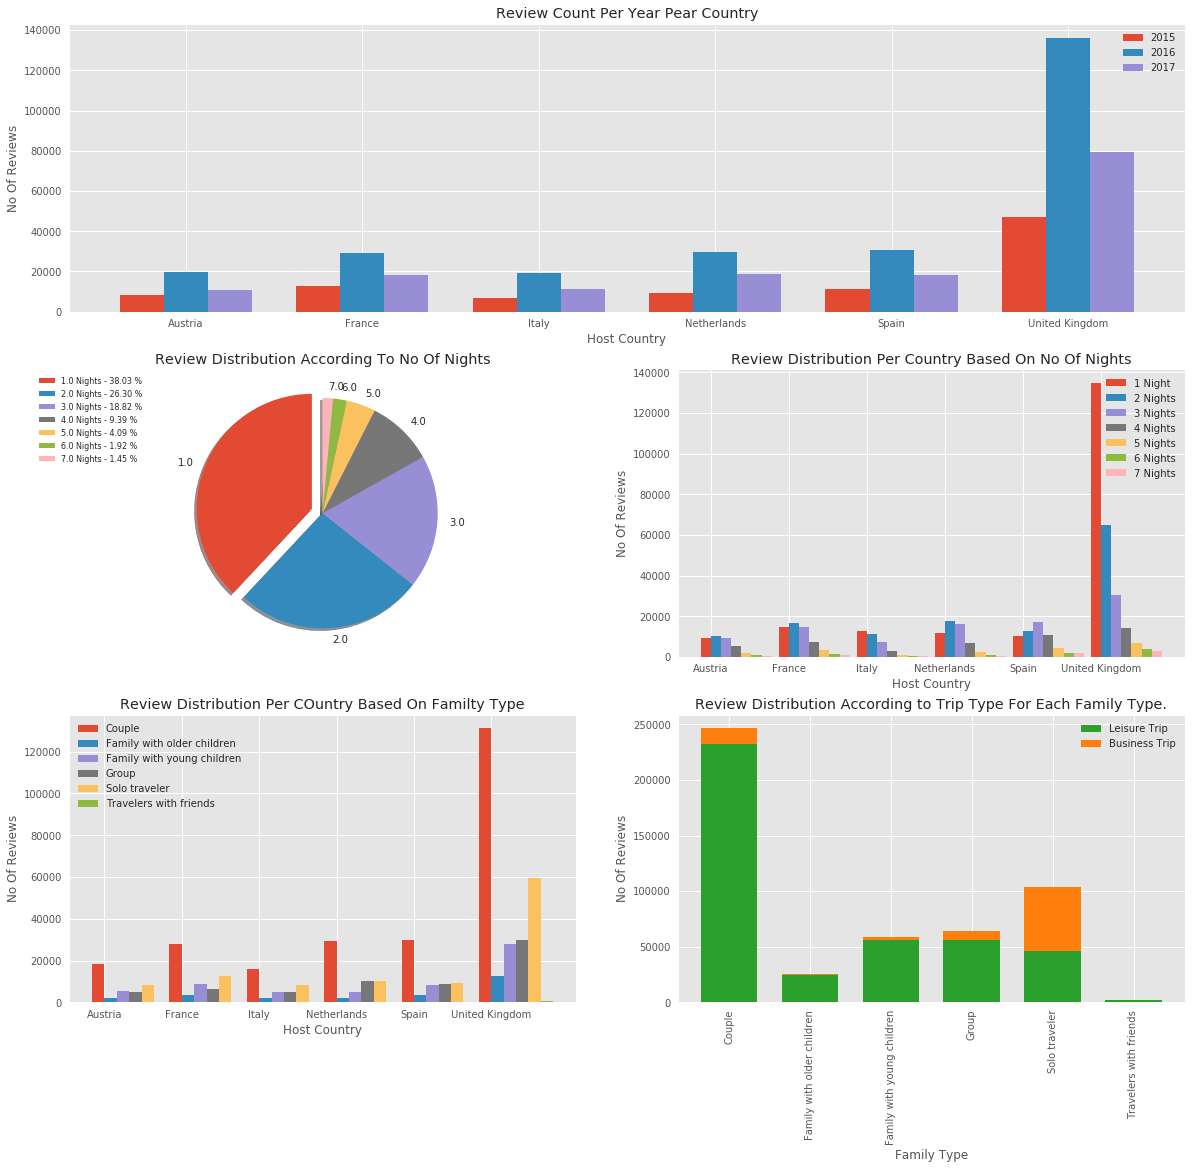

In [5]:
hotel_country_to_no_of_nights = hotel_reviews[hotel_reviews.No_Of_Nights<=7].groupby(by=['Hotel_Country','No_Of_Nights']).count()[['Hotel_Address']].reset_index().set_index('No_Of_Nights')
hotel_country_to_yearly_visitors = hotel_reviews.groupby(by=['Hotel_Country','Year']).count()[['Hotel_Address']].reset_index().set_index('Year')
hotel_country_to_family_type = hotel_reviews.groupby(by=['Hotel_Country','Family_Type']).count()[['Hotel_Address']].reset_index().set_index('Family_Type')
hotel_country_to_trip_type = hotel_reviews.groupby(by=['Hotel_Country','Trip_Type']).count()[['Hotel_Address']].reset_index().set_index('Hotel_Country')
family_type_to_trip_type = hotel_reviews.groupby(by=['Family_Type', 'Trip_Type']).count()[['Hotel_Address']].reset_index().set_index('Family_Type')

no_of_nights_count = sorted([item for item in Counter(hotel_reviews.No_Of_Nights).items() if item[1] > 3000], key=lambda x:x[0])
no_of_nights_count = list(zip(*no_of_nights_count))

#print(no_of_nights_count)
max_arg = np.argmax(no_of_nights_count[1])
explode = np.zeros(len(no_of_nights_count[0]))
explode[max_arg] = 0.1


with plt.style.context(('seaborn','ggplot')):
    fig = plt.figure(figsize=(20,18))
    gs = fig.add_gridspec(3, 2)
    #fig.add_subplot(gs[0,:])
    fig.add_subplot(gs[0,:])
    width = 0.25
    index = np.arange(6)
    plt.bar(index, hotel_country_to_yearly_visitors.loc[2015].Hotel_Address, width= width, label='2015')
    plt.bar(index+width, hotel_country_to_yearly_visitors.loc[2016].Hotel_Address, width= width, label='2016')
    plt.bar(index+2*width, hotel_country_to_yearly_visitors.loc[2017].Hotel_Address, width= width, label='2017')
    plt.xticks(index+width, hotel_country_to_yearly_visitors.Hotel_Country.unique(), )
    plt.xlabel('Host Country')
    plt.ylabel('No Of Reviews')
    plt.title('Review Count Per Year Pear Country')
    plt.legend(loc='best')
    
    fig.add_subplot(gs[1,0])
    patches, texts = plt.pie(no_of_nights_count[1], explode=explode, labels=no_of_nights_count[0], shadow=True, startangle=90)
    pct = np.array(no_of_nights_count[1])*100 / np.array(no_of_nights_count[1]).sum()
    labels = ['{0} Nights - {1:1.2f} %'.format(i,j)  for i,j in sorted(zip(no_of_nights_count[0],pct),key = lambda x: x[0])]
    plt.title('Review Distribution According To No Of Nights')
    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)


    fig.add_subplot(gs[1,1])
    index = np.arange(6)
    width = 0.13
    plt.bar(index, hotel_country_to_no_of_nights.loc[1].Hotel_Address, width= width, label='1 Night')
    plt.bar(index+width, hotel_country_to_no_of_nights.loc[2].Hotel_Address, width= width, label='2 Nights')
    plt.bar(index+2*width, hotel_country_to_no_of_nights.loc[3].Hotel_Address, width= width, label='3 Nights')
    plt.bar(index+3*width, hotel_country_to_no_of_nights.loc[4].Hotel_Address, width= width, label='4 Nights')
    plt.bar(index+4*width, hotel_country_to_no_of_nights.loc[5].Hotel_Address, width= width, label='5 Nights')
    plt.bar(index+5*width, hotel_country_to_no_of_nights.loc[6].Hotel_Address, width= width, label = '6 Nights')
    plt.bar(index+6*width, hotel_country_to_no_of_nights.loc[7].Hotel_Address, width= width, label = '7 Nights')
    plt.xticks(index+width/2, hotel_country_to_no_of_nights.Hotel_Country.unique(),)
    plt.xlabel('Host Country')
    plt.ylabel('No Of Reviews')
    plt.title('Review Distribution Per Country Based On No Of Nights')
    plt.legend(loc='best')
    
    fig.add_subplot(gs[2,0])
    width = 0.16
    index = np.arange(6)
    plt.bar(index, hotel_country_to_family_type.loc['Couple'].Hotel_Address, width= width, label='Couple')
    plt.bar(index+width, hotel_country_to_family_type.loc['Family with older children'].Hotel_Address, width= width, label='Family with older children')
    plt.bar(index+2*width, hotel_country_to_family_type.loc['Family with young children'].Hotel_Address, width= width, label='Family with young children')
    plt.bar(index+3*width, hotel_country_to_family_type.loc['Group'].Hotel_Address, width= width, label='Group')
    plt.bar(index+4*width, hotel_country_to_family_type.loc['Solo traveler'].Hotel_Address, width= width, label='Solo traveler')
    plt.bar(index+5*width, hotel_country_to_family_type.loc['Travelers with friends'].Hotel_Address, width= width, label = 'Travelers with friends')
    plt.xticks(index+width/2, hotel_country_to_family_type.Hotel_Country.unique(), )
    plt.xlabel('Host Country')
    plt.ylabel('No Of Reviews')
    plt.title('Review Distribution Per COuntry Based On Familty Type')
    plt.legend(loc='best')
    
    
    fig.add_subplot(gs[2,1])
    family_types = []
    results = []
    for idx in family_type_to_trip_type.index.unique():
        family_types.append(idx)
        results.append(family_type_to_trip_type.loc[idx].values[:,1].tolist())
    results = np.array(results)

    plt.bar(range(6) , results[:,1], width=0.7, label='Leisure Trip', color='tab:green')
    plt.bar(range(6) , results[:,0], bottom = results[:,1], width=0.7, label='Business Trip', color='tab:orange')
    plt.xticks(range(6), family_types, rotation=90)
    plt.xlabel('Family Type')
    plt.ylabel('No Of Reviews')
    plt.title('Review Distribution According to Trip Type For Each Family Type.')
    plt.legend(loc='best')

## Heatmap Showing Average Negative/Positive Words Written in Review by Host Countries
Below matrix shows relationship between two host countries based on average number of positive/negative words written in review by other host country when they visited that country.

Some of findings from figure 1:
* Austrian People has written around ~21 negative words for Italy, Netherlands, Spain and UK.
* France has quite less negative words per review with less than 17 negative words per in bad review.
* Austira,France and Spain has given bad reviews to Netherlands
* Netherlands peoples has given bad reviews to Austria
* UK has given less bad reviews to others
* Austrians has given baddest reviews to UK

Some of findings from figure 1:
* UK has given very positive reviews to all countries except itself.
* Austraians has given good reviews to France, Italy and Spain
* Italy has given good reviews to Austria and Netherlands
* Netherlands has given good reviews to Austria and Spain
* Spain has given good reviews to Austria and Netherlands
* Austria has highest amount of positive reviews and UK has least amount of positive reviews.


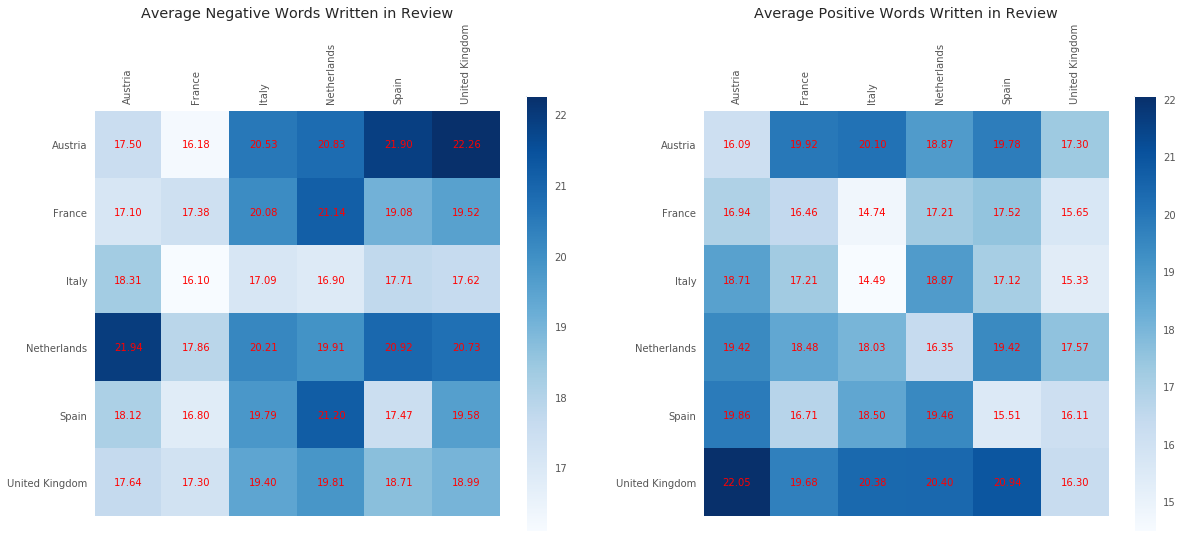

In [6]:
average_negative_words_between_hotel_country_and_reviewer_nationality = pd.pivot_table(hotel_reviews, values='Review_Total_Negative_Word_Counts', index=['Reviewer_Nationality'], columns=['Hotel_Country'], aggfunc=np.mean).fillna(0)
average_negative_words_between_hotel_country_and_reviewer_nationality =  average_negative_words_between_hotel_country_and_reviewer_nationality.loc[average_negative_words_between_hotel_country_and_reviewer_nationality.columns]

average_positive_words_between_hotel_country_and_reviewer_nationality = pd.pivot_table(hotel_reviews, values='Review_Total_Positive_Word_Counts', index=['Reviewer_Nationality'], columns=['Hotel_Country'], aggfunc=np.mean).fillna(0)
average_positive_words_between_hotel_country_and_reviewer_nationality =  average_positive_words_between_hotel_country_and_reviewer_nationality.loc[average_positive_words_between_hotel_country_and_reviewer_nationality.columns]

with plt.style.context(('seaborn','ggplot')):
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    fig = plt.figure(figsize=(20, 8))
    
    plt.subplot(1,2,1)
    plt.imshow(average_negative_words_between_hotel_country_and_reviewer_nationality.values, cmap=plt.cm.Blues)
    for i in range(6):
        for j in range(6):
            plt.text(j, i, '%.2f'%average_negative_words_between_hotel_country_and_reviewer_nationality.values[i,j], horizontalalignment='center',
                    verticalalignment='center', color='red')
    plt.xticks(rotation='vertical', ticks=range(len(average_negative_words_between_hotel_country_and_reviewer_nationality.columns)),labels=average_negative_words_between_hotel_country_and_reviewer_nationality.columns)
    plt.yticks(ticks=range(len(average_negative_words_between_hotel_country_and_reviewer_nationality.columns)),labels=average_negative_words_between_hotel_country_and_reviewer_nationality.columns)
    plt.colorbar()
    plt.title('Average Negative Words Written in Review')
    plt.grid(None);
    
    plt.subplot(1,2,2)

    plt.imshow(average_positive_words_between_hotel_country_and_reviewer_nationality.values, cmap=plt.cm.Blues)
    for i in range(6):
        for j in range(6):
            plt.text(j, i, '%.2f'%average_positive_words_between_hotel_country_and_reviewer_nationality.values[i,j], horizontalalignment='center',
                    verticalalignment='center', color='red')
    plt.xticks(rotation='vertical', ticks=range(len(average_positive_words_between_hotel_country_and_reviewer_nationality.columns)), labels=average_positive_words_between_hotel_country_and_reviewer_nationality.columns)
    plt.yticks(ticks=range(len(average_positive_words_between_hotel_country_and_reviewer_nationality.columns)),labels=average_positive_words_between_hotel_country_and_reviewer_nationality.columns)
    plt.colorbar()
    plt.title('Average Positive Words Written in Review')
    plt.grid(None);

## Choropleth Map of Average Negative/Positive Words Written Per Review from Other Countries to UK Hotels
We have below drawn choropleth map of average positive/negative words written in review by each countries when they visited UK hotels. We have also highlighted top 10 countries whose people has given most positive/negative reviews.

Below are list of common findings from figure 1:
* People from North America, SOuth America and Europe Continent has given quite positive reviews with few exceptions from Asia and Africa.
* People from Antarctica has given most positive reviews.
* Countries like US, Finland, Bahamas, Jamaica, Trinidad and Tobago, Sierre Leone, Uganda, Brunei and Vantau has written more than 25 positive words in positive reviews.

Below are list of common findings from figure 2:
* Russia, African Countries and Asian Countries has on an average written more bad reviews.
* All countries with most negative words belongs to Africa, Asia and some to Europe itself.
* Countries like Moldova, Montonegero, Armenia, Afghanistan, Rwanda, Malvi, Namibia, Laos, Brunei and Papua New Guinea has written quite bad reviews with on average 30-35 bad words per review.


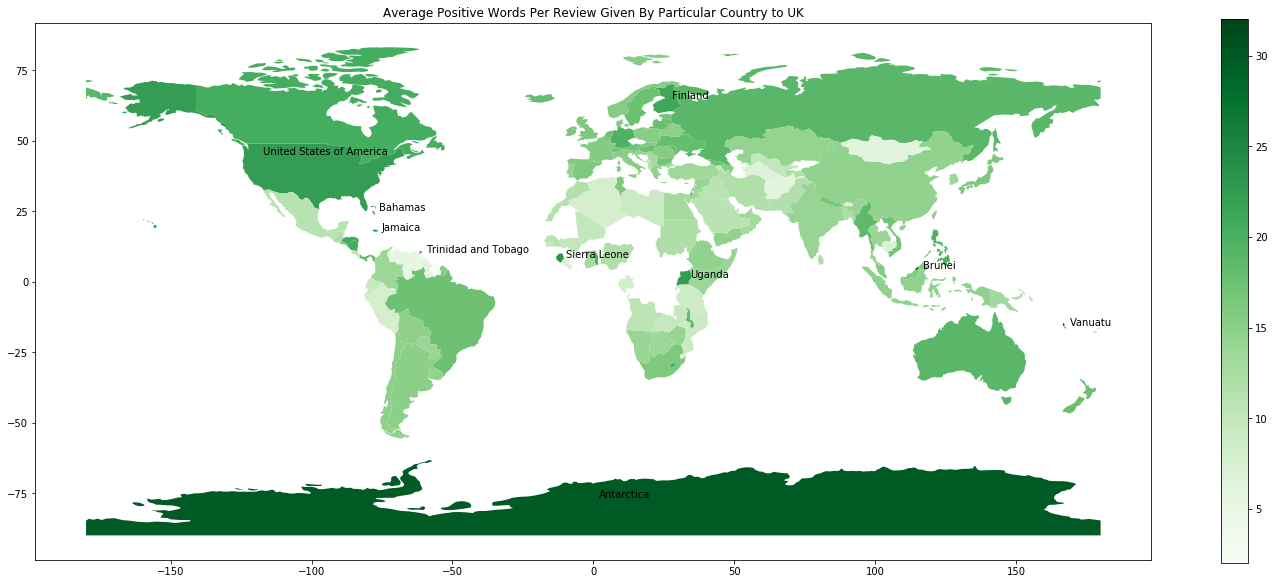

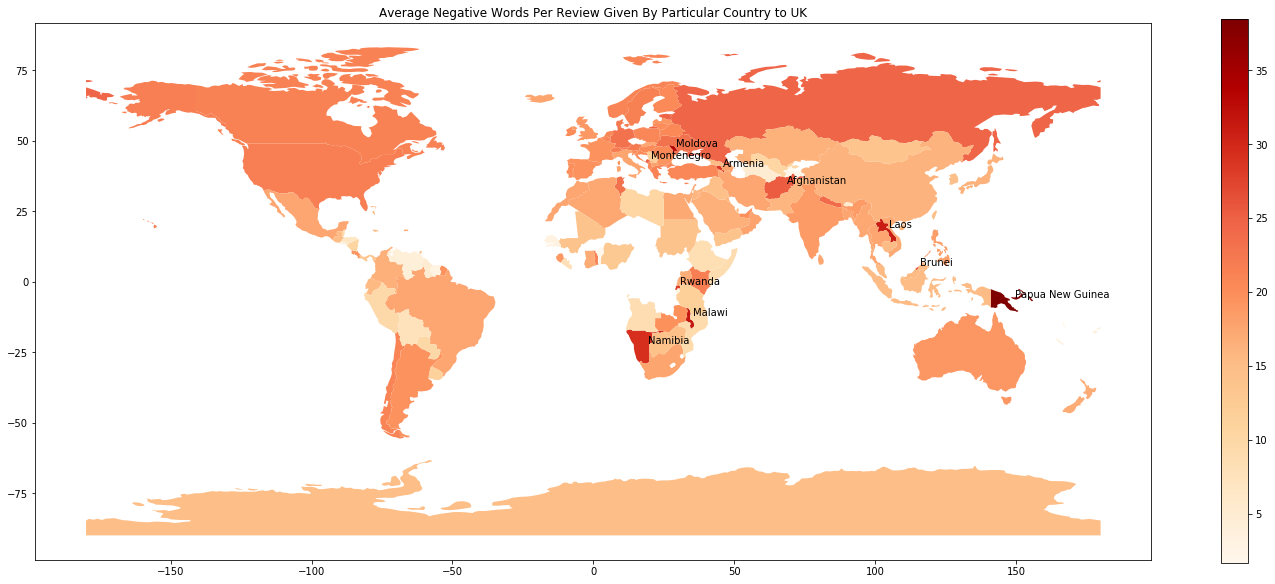

In [7]:
average_user_rating_by_country = hotel_reviews[hotel_reviews.Hotel_Country == 'United Kingdom'].groupby(by='Reviewer_Nationality').mean()[['Review_Total_Positive_Word_Counts', ]].sort_values('Review_Total_Positive_Word_Counts',ascending=False)
average_user_rating_by_country.index = [i.strip() for i in average_user_rating_by_country.index]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.set_index('name')
average_user_rating_by_country = world.join(average_user_rating_by_country)
average_user_rating_by_country = average_user_rating_by_country[average_user_rating_by_country.Review_Total_Positive_Word_Counts > 0.0]
average_user_rating_by_country = average_user_rating_by_country.sort_values('Review_Total_Positive_Word_Counts', ascending=False)
average_user_rating_by_country = average_user_rating_by_country[average_user_rating_by_country.index != 'Laos']
average_user_rating_by_country.plot(column='Review_Total_Positive_Word_Counts', cmap='Greens', legend=True, figsize=(25,10))
for country in average_user_rating_by_country.index[:10]:
    x1,y1,x2,y2 = average_user_rating_by_country.loc[country].geometry.bounds
    y, x = (y1+y2)/2, (x1+x2)/2
    plt.text(x+2,y, country, fontsize=10)
plt.title('Average Positive Words Per Review Given By Particular Country to UK')    

average_user_rating_by_country = hotel_reviews[hotel_reviews.Hotel_Country == 'United Kingdom'].groupby(by='Reviewer_Nationality').mean()[['Review_Total_Negative_Word_Counts', ]].sort_values('Review_Total_Negative_Word_Counts',ascending=False)
average_user_rating_by_country.index = [i.strip() for i in average_user_rating_by_country.index]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.set_index('name')
average_user_rating_by_country = world.join(average_user_rating_by_country)
average_user_rating_by_country = average_user_rating_by_country[average_user_rating_by_country.Review_Total_Negative_Word_Counts > 0.0]
average_user_rating_by_country = average_user_rating_by_country.sort_values('Review_Total_Negative_Word_Counts', ascending=False)
average_user_rating_by_country = average_user_rating_by_country[~average_user_rating_by_country.index.isin(['Syria','Lesotho'])]
average_user_rating_by_country.plot(column='Review_Total_Negative_Word_Counts', cmap='OrRd', legend=True, figsize=(25,10))
for country in average_user_rating_by_country.index[:10]:
    x1,y1,x2,y2 = average_user_rating_by_country.loc[country].geometry.bounds
    y, x = (y1+y2)/2, (x1+x2)/2
    plt.text(x+1,y+1, country, fontsize=10)
plt.title('Average Negative Words Per Review Given By Particular Country to UK');

## Word Cloud Of Positive and Negative Reviews Given to UK Hotels

Below we have shown word cloud of common words occuring in reviews given as negative and positive to UK hotels.

CPU times: user 1min 57s, sys: 1.86 s, total: 1min 59s
Wall time: 1min 59s


Text(0.5, 1.0, 'Negative Word Cloud')

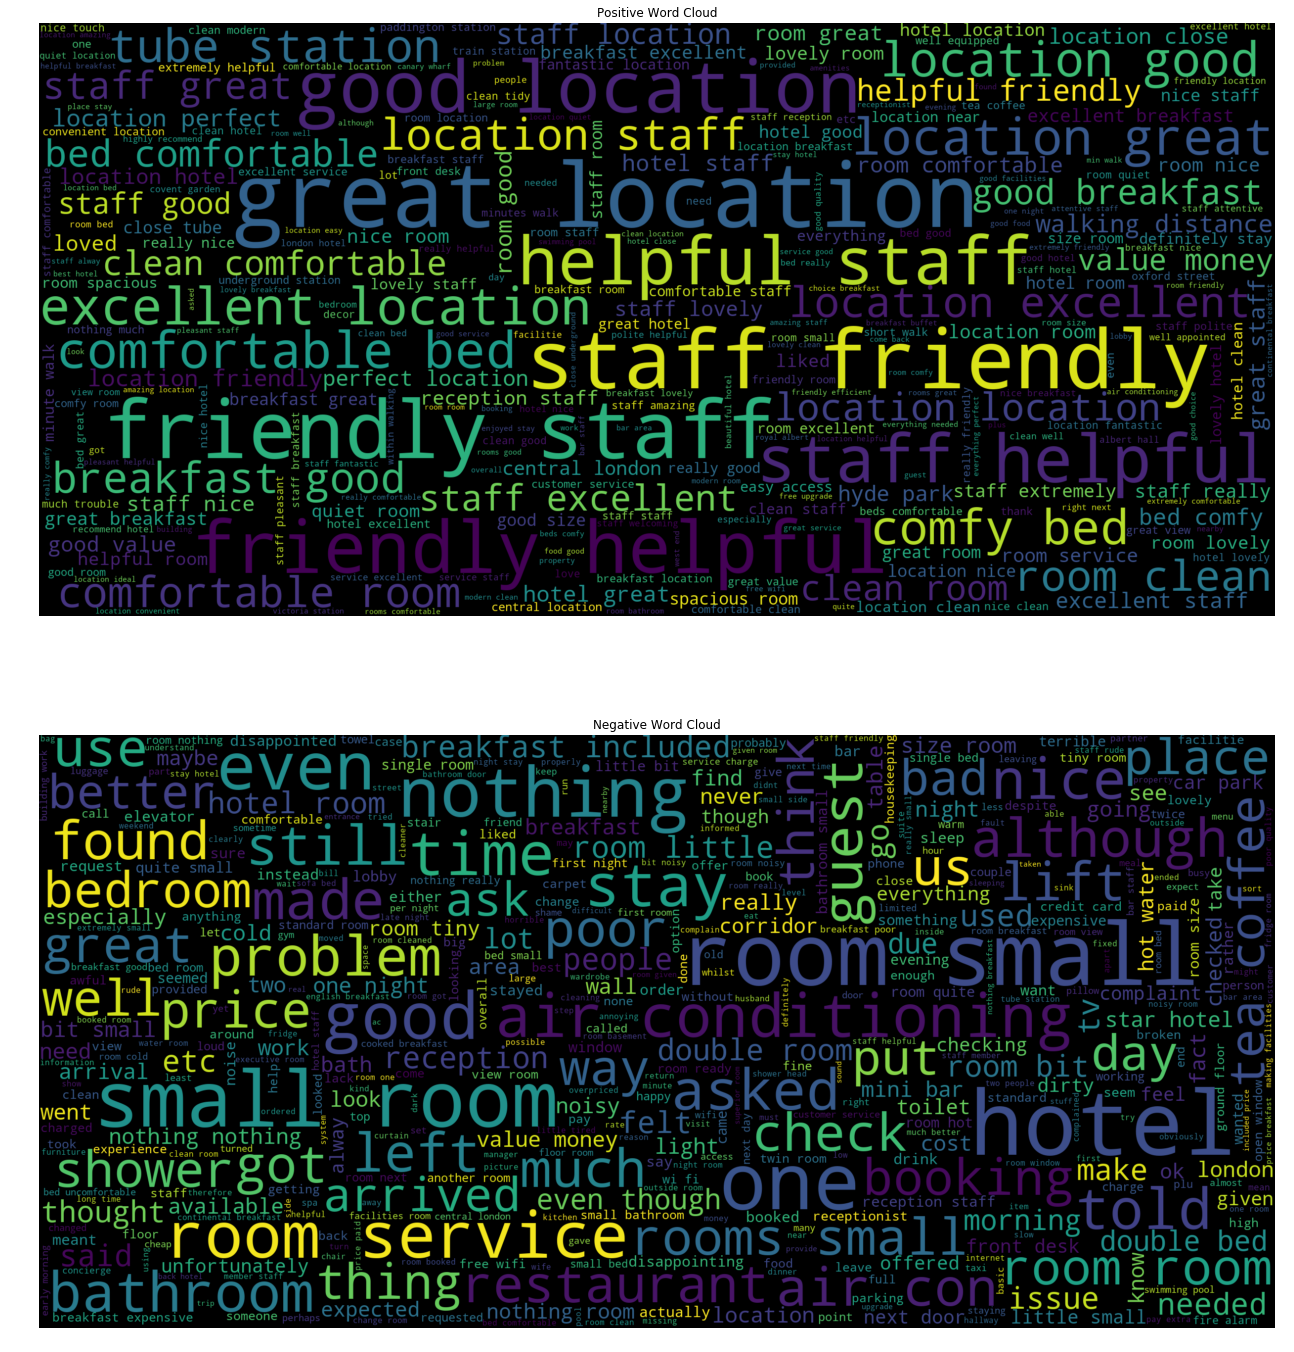

In [8]:
%%time

positive_review_words = ' '.join([' '.join(nltk.tokenize.word_tokenize(sent.lower())) for sent in hotel_reviews[hotel_reviews.Hotel_Country == 'United Kingdom'].Positive_Review if sent != 'No Positive'])
negative_review_words = ' '.join([' '.join(nltk.tokenize.word_tokenize(sent.lower())) for sent in hotel_reviews[hotel_reviews.Hotel_Country == 'United Kingdom'].Negative_Review if sent != 'No Negative'])

positive_wordcloud = WordCloud(width=2500, height=1200, 
                      max_font_size=180, 
                      min_font_size=15,
                      max_words=500,
                      background_color="black", 
                      stopwords=set(stopwords.words('english') + list(STOPWORDS))).generate(positive_review_words)

negative_wordcloud = WordCloud(width=2500, height=1200,
                      max_font_size=180, 
                      min_font_size=15,
                      max_words=500,
                      background_color="black", 
                      stopwords=set(stopwords.words('english') + list(STOPWORDS))).generate(negative_review_words)

fig = plt.figure(figsize=(28,24))
plt.subplot(2,1,1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Positive Word Cloud');

plt.subplot(2,1,2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Negative Word Cloud');

In [9]:
##lng = x, lat=y
#uk_reviews = hotel_reviews[hotel_reviews.Hotel_Country == 'United Kingdom'].groupby(by='Hotel_Name').mean()[['Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts', 'lat', 'lng']]
#uk_reviews_type = pd.pivot_table(hotel_reviews[hotel_reviews.Hotel_Country == 'United Kingdom'],  values=['Family_Type'], index=['Hotel_Name'], columns=['Review_Type'], aggfunc=len)
#uk_reviews_type.columns = [ 'Negative',  'Neutral', 'Positive']
#uk_reviews = uk_reviews.join(uk_reviews_type)
#uk_reviews = uk_reviews.drop(columns=['Neutral'])
#uk_reviews['Overall_Decision'] = ['Negative' if neg>pos else 'Positive' for neg,pos in zip(uk_reviews.Negative,uk_reviews.Positive)]
#uk_reviews